In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
df_le = pd.read_csv('data/covariance_features_left_eye_v2.csv', index_col=0)
df_re = pd.read_csv('data/covariance_features_right_eye_v2.csv', index_col=0)
df_nt = pd.read_csv('data/covariance_features_nose_tip_v2.csv', index_col=0)

In [3]:
df_le

,cloud,expression,type,gf01_r_10,gf02_r_10,gf03_r_10,gf04_r_10,gf05_r_10,gf06_r_10,gf07_r_10,...,gf09_r_25,gf01_r_30,gf02_r_30,gf03_r_30,gf04_r_30,gf05_r_30,gf06_r_30,gf07_r_30,gf08_r_30,gf09_r_30
0,bs000_CR_RD_0.pcd,RD,CR,36.062347,1.0,-101.317894,0.920264,0.319981,0.600284,0.053895,...,0.381120,445.262299,1.0,-2377.278564,0.943242,0.403855,0.539388,0.037405,0.056757,0.331500
1,bs000_PR_SD_0.pcd,SD,PR,40.257923,1.0,-114.833755,0.908905,0.588236,0.320670,0.051454,...,0.068332,412.261292,1.0,-2153.698730,0.942233,0.613210,0.329022,0.033416,0.057767,0.058866
2,bs000_LFAU_15_0.pcd,15,LFAU,36.221920,1.0,-98.865532,0.896532,0.761360,0.135172,0.052567,...,0.067855,409.573883,1.0,-2133.431641,0.933933,0.568028,0.365906,0.038859,0.066067,0.043792
3,bs000_O_GLASSES_0.pcd,GLASSES,O,40.550774,1.0,-114.919006,0.888258,0.761890,0.126368,0.056283,...,0.076982,429.876251,1.0,-2260.915771,0.938708,0.625586,0.313122,0.035061,0.061292,0.050543
4,bs000_UFAU_44_0.pcd,44,UFAU,43.638218,1.0,-129.124741,0.933253,0.787089,0.146165,0.034753,...,0.068653,433.804260,1.0,-2280.005859,0.930669,0.638279,0.292390,0.039017,0.069331,0.042453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,bs104_LFAU_34_0.pcd,34,LFAU,45.260921,1.0,-136.854736,0.953111,0.824160,0.128952,0.024448,...,0.091546,434.404724,1.0,-2285.055908,0.932837,0.640569,0.292268,0.037840,0.067163,0.064082
4662,bs104_YR_R45_0.pcd,R45,YR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4663,bs104_LFAU_12R_0.pcd,12R,LFAU,47.206203,1.0,-144.472565,0.949408,0.855676,0.093732,0.025854,...,0.074054,429.422119,1.0,-2255.883545,0.937450,0.680662,0.256789,0.034639,0.062550,0.056242
4664,bs104_PR_U_0.pcd,U,PR,45.980553,1.0,-139.955307,0.955693,0.785656,0.170037,0.023640,...,0.114770,429.677094,1.0,-2257.811035,0.937751,0.673303,0.264449,0.034625,0.062249,0.085153


In [4]:
df_re

,cloud,expression,type,gf01_r_10,gf02_r_10,gf03_r_10,gf04_r_10,gf05_r_10,gf06_r_10,gf07_r_10,...,gf09_r_25,gf01_r_30,gf02_r_30,gf03_r_30,gf04_r_30,gf05_r_30,gf06_r_30,gf07_r_30,gf08_r_30,gf09_r_30
0,bs000_CR_RD_0.pcd,RD,CR,34.481819,1.0,-94.353477,0.929584,0.499189,0.430395,0.042936,...,0.011067,372.234741,1.0,-1895.174072,0.922530,0.642008,0.280522,0.043112,0.077470,0.012038
1,bs000_PR_SD_0.pcd,SD,PR,36.538013,1.0,-99.908806,0.886836,0.514971,0.371866,0.064988,...,0.088511,409.226807,1.0,-2125.318604,0.921769,0.535330,0.386439,0.046242,0.078231,0.056806
2,bs000_LFAU_15_0.pcd,15,LFAU,44.641808,1.0,-130.688965,0.885949,0.748903,0.137046,0.057689,...,0.085963,441.056580,1.0,-2308.972168,0.898634,0.566618,0.332016,0.057290,0.101366,0.048933
3,bs000_O_GLASSES_0.pcd,GLASSES,O,45.883480,1.0,-134.346573,0.857039,0.721168,0.135871,0.071228,...,0.074571,444.294373,1.0,-2336.041260,0.915291,0.670767,0.244523,0.046033,0.084709,0.047598
4,bs000_UFAU_44_0.pcd,44,UFAU,41.321648,1.0,-119.913467,0.931032,0.722523,0.208510,0.037070,...,0.072324,424.058807,1.0,-2215.384521,0.921994,0.589629,0.332365,0.044686,0.078006,0.044605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,bs104_LFAU_34_0.pcd,34,LFAU,43.889996,1.0,-131.526993,0.955589,0.826125,0.129464,0.023192,...,0.083322,422.042877,1.0,-2213.432129,0.941888,0.645406,0.296482,0.032988,0.058112,0.070180
4662,bs104_YR_R45_0.pcd,R45,YR,41.308975,1.0,-121.233940,0.952753,0.697188,0.255565,0.026370,...,0.116418,396.505005,1.0,-2056.414551,0.947915,0.846081,0.101833,0.026707,0.052085,0.100655
4663,bs104_LFAU_12R_0.pcd,12R,LFAU,46.022224,1.0,-139.170883,0.941866,0.818028,0.123838,0.030054,...,0.092350,431.800354,1.0,-2272.777100,0.939058,0.639259,0.299799,0.034604,0.060942,0.072421
4664,bs104_PR_U_0.pcd,U,PR,47.483337,1.0,-145.772705,0.951395,0.747388,0.204008,0.026350,...,0.115979,434.115234,1.0,-2286.691162,0.939181,0.665091,0.274090,0.034039,0.060819,0.091076


In [5]:
df_nt

,cloud,expression,type,gf01_r_10,gf02_r_10,gf03_r_10,gf04_r_10,gf05_r_10,gf06_r_10,gf07_r_10,...,gf09_r_25,gf01_r_30,gf02_r_30,gf03_r_30,gf04_r_30,gf05_r_30,gf06_r_30,gf07_r_30,gf08_r_30,gf09_r_30
0,bs000_CR_RD_0.pcd,RD,CR,39.612831,1.0,-113.233162,0.930281,0.807176,0.123105,0.035816,...,0.014179,251.114471,1.0,-1154.587891,0.765857,0.182155,0.583702,0.141867,0.234143,0.024981
1,bs000_PR_SD_0.pcd,SD,PR,43.013111,1.0,-126.593880,0.931653,0.840711,0.090943,0.034564,...,0.018735,271.958862,1.0,-1256.047852,0.668412,0.130081,0.538331,0.184908,0.331588,0.029849
2,bs000_LFAU_15_0.pcd,15,LFAU,44.262203,1.0,-132.053665,0.940795,0.803262,0.137533,0.030809,...,0.011649,274.157104,1.0,-1269.098633,0.659558,0.094547,0.565011,0.191752,0.340442,0.025223
3,bs000_O_GLASSES_0.pcd,GLASSES,O,42.210541,1.0,-122.814705,0.918337,0.880037,0.038300,0.039965,...,0.007873,269.660400,1.0,-1247.277344,0.688240,0.117953,0.570288,0.179021,0.311760,0.020142
4,bs000_UFAU_44_0.pcd,44,UFAU,42.355164,1.0,-123.678505,0.924433,0.880251,0.044182,0.037200,...,0.003972,268.620850,1.0,-1236.770752,0.667460,0.137309,0.530151,0.184500,0.332540,0.032410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,bs104_LFAU_34_0.pcd,34,LFAU,42.306458,1.0,-123.694427,0.929373,0.843179,0.086194,0.035591,...,0.033342,297.665680,1.0,-1424.952393,0.777287,0.154493,0.622794,0.139203,0.222713,0.020534
4662,bs104_YR_R45_0.pcd,R45,YR,36.574482,1.0,-104.968498,0.956392,0.394339,0.562053,0.029434,...,0.000964,220.258423,1.0,-1001.297180,0.851462,0.227625,0.623837,0.097421,0.148538,0.003737
4663,bs104_LFAU_12R_0.pcd,12R,LFAU,42.126892,1.0,-122.476120,0.918158,0.878130,0.040028,0.040083,...,0.029535,266.999847,1.0,-1232.966675,0.709557,0.171077,0.538479,0.165782,0.290443,0.054350
4664,bs104_PR_U_0.pcd,U,PR,41.012726,1.0,-117.781166,0.910067,0.882667,0.027400,0.043603,...,0.004970,265.378845,1.0,-1232.987671,0.753638,0.168432,0.585206,0.148308,0.246362,0.006188


- gf01 Somatório: λ1 + λ2 + λ3
- gf02 Omnivariância: (λ1 * λ2 * λ3) ^ 1/3
- gf03 Autoentropia: - Σi=1->3 λi * ln(λi)
- gf04 Anisotropia: (λ1 − λ3) / λ1
- gf05 Planaridade: (λ2 − λ3) / λ1
- gf06 Linearidade: (λ1 − λ2) / λ1
- gf07 Variação de superfı́cie: λ3 / (λ1 + λ2 + λ3)
- gf08 Esfericidade: λ3 / λ1
- gf09 Verticalidade: 1 − |<[0 0 1], e3>|

In [6]:
# global variables
nfeatures = 9
columns = list(df_le.columns[3:])
features = ['Somatório', 'Omnivariância', 'Autoentropia',
            'Anisotropia', 'Planaridade', 'Linearidade',
            'Variação de Superfície', 'Esfericidade', 'Verticalidade']
colors = ['blue', 'cyan', 'green', 'red', 'brown']
labels = ['Raio 10', 'Raio 15', 'Raio 20', 'Raio 25', 'Raio 30']

In [7]:
def plot_histograms(df,  point_name, radius=10, expression=None):
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    cols = [f'gf01_r_{radius}', f'gf02_r_{radius}', f'gf03_r_{radius}',
            f'gf04_r_{radius}', f'gf05_r_{radius}', f'gf06_r_{radius}',
            f'gf07_r_{radius}', f'gf08_r_{radius}', f'gf09_r_{radius}']

    if expression is not None:
        df = df.loc[df['expression'] == expression]

    i, j = 0, 0 # refactor
    for index, column in enumerate(cols):
        df.hist(ax=axes[i, j], column=[column], bins=10)
        axes[i, j].set_title(features[index])
        j += 1
        if j == 3:
            i += 1
            j = 0

    expression = '' if expression is None else f' - Expressão: {expression}'
    title = f'Histogramas - {point_name} - Raio: {radius} {expression}'
    fig.suptitle(title, fontsize=18)
    plt.subplots_adjust(top=0.9, wspace=0.25, hspace=0.25)
    plt.show()

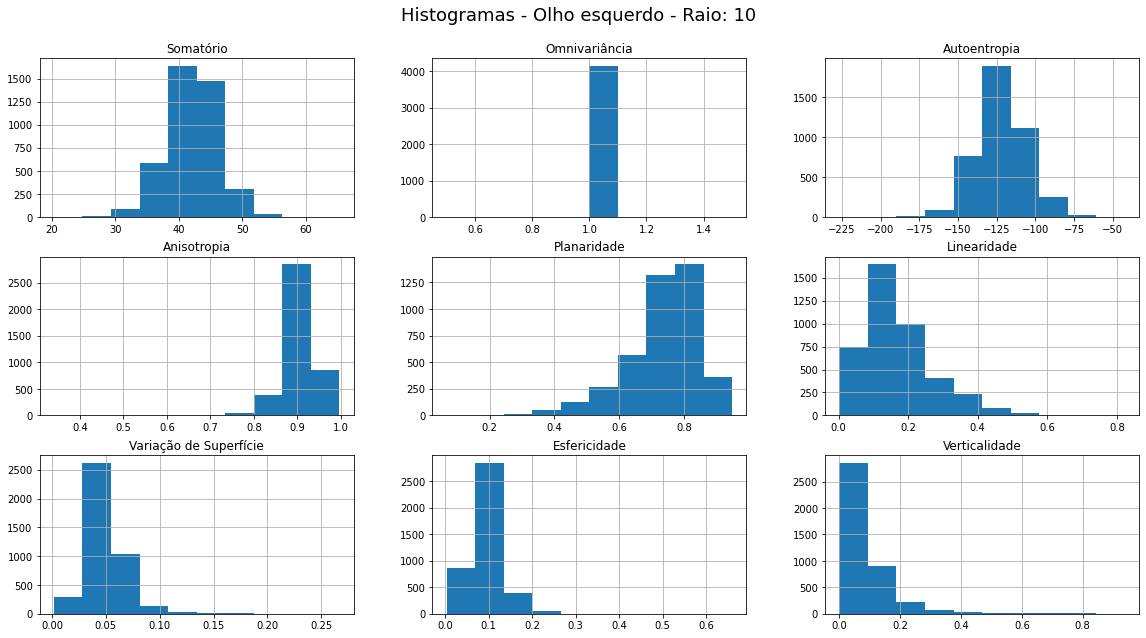

In [8]:
plot_histograms(df_le, point_name='Olho esquerdo', radius=10)

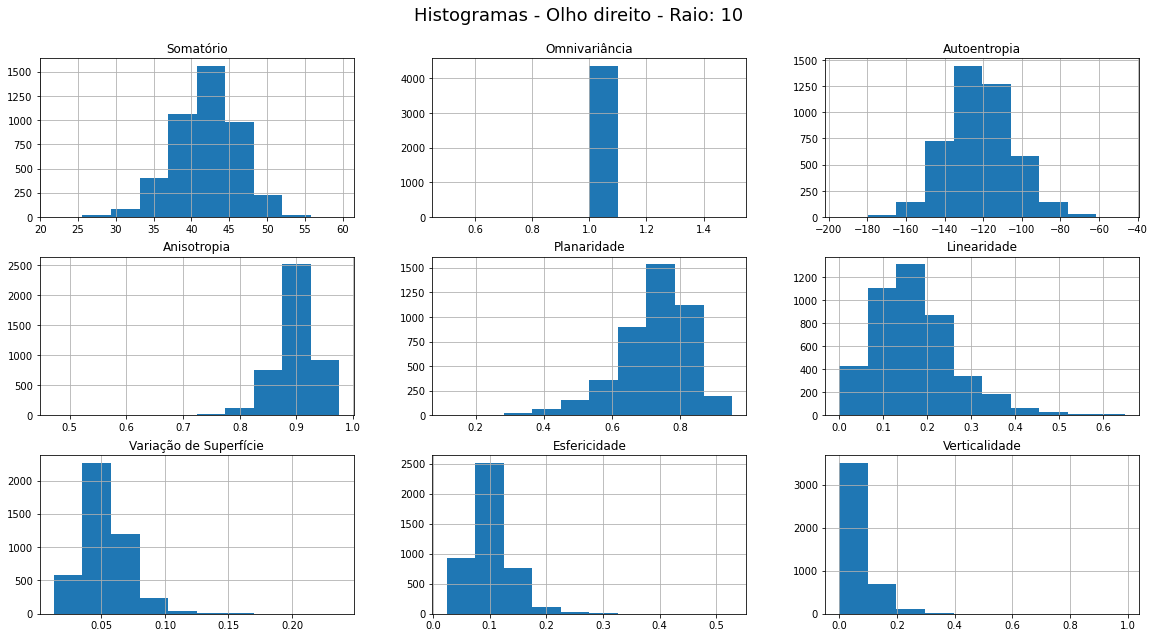

In [9]:
plot_histograms(df_re, point_name='Olho direito', radius=10)

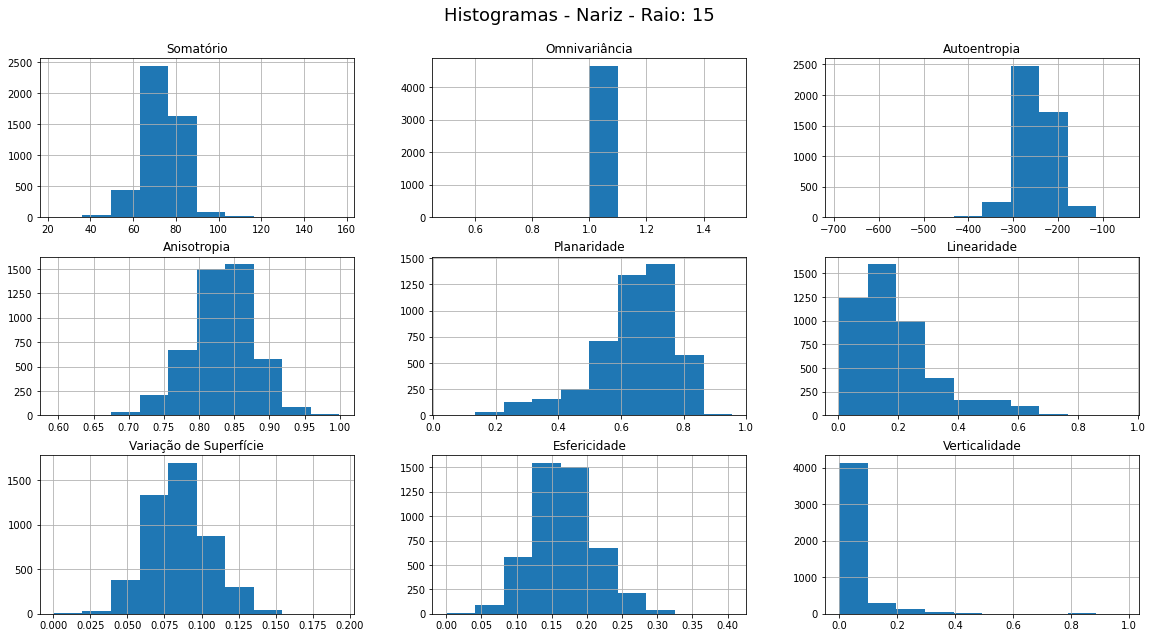

In [10]:
plot_histograms(df_nt, point_name='Nariz', radius=15)

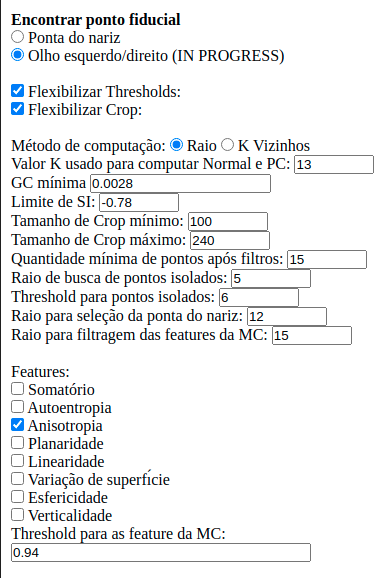

In [11]:
# plot_histograms(df_re, point_name='Olho direito')

In [12]:
# plot_histograms(df_nt, point_name='Ponta do nariz')

In [13]:
def plot_histograms_together(df, columns=columns, title=''):    
    colsNames = []
    for i in range(len(features)):
        aux = []
        for i in np.arange(i, len(columns), len(features)):
            aux.append(columns[i])
        colsNames.append(aux)
    
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    i, j = 0, 0 # refactor
    for index, col in enumerate(colsNames):
        for c in col:
            axes[i, j].hist(df[c], bins=10, alpha=1)

        axes[i, j].set_title(features[index])
        axes[i, j].legend(labels)
        j += 1
        if j == 3:
            i += 1
            j = 0

    fig.suptitle(title, fontsize=18)
    plt.subplots_adjust(top=0.9, wspace=0.25, hspace=0.25)
    plt.show()

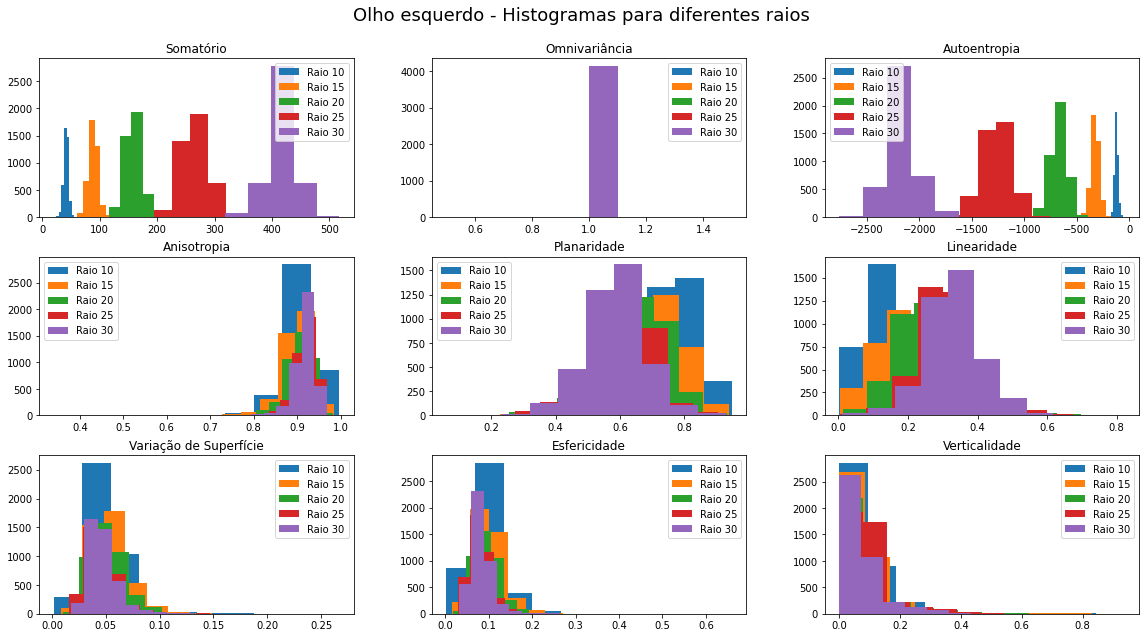

In [14]:
plot_histograms_together(df_le, title='Olho esquerdo - Histogramas para diferentes raios')

In [15]:
# plot_histograms_together(df_re, title='Olho direito - Histogramas para diferentes raios')

In [16]:
# gfIndex: valor entre 0-8
# 0 significa Somatório
# 8 significa Verticalidade
def plot_histogram_together(df, gfIndex=0):
    colsNames = []
    for i in range(nfeatures):
        aux = []
        for i in np.arange(i, len(columns), nfeatures):
            aux.append(columns[i])
        colsNames.append(aux)        
    
    for col in colsNames[gfIndex]:
        plt.hist(df[col], bins=10, alpha=0.9)

    plt.title('Histograma: ' + features[gfIndex])
    plt.legend(labels)

    plt.show()

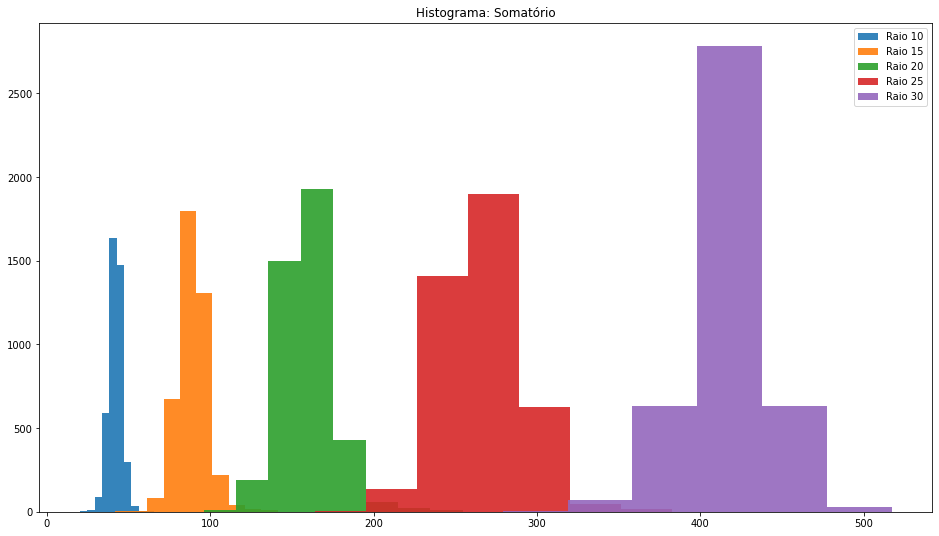

In [17]:
plot_histogram_together(df_le, 0)

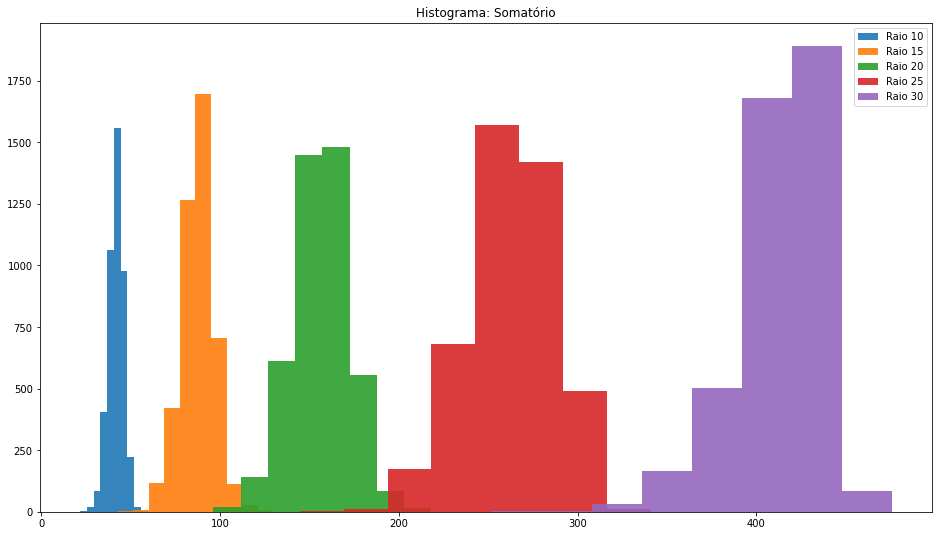

In [18]:
plot_histogram_together(df_re, 0)

In [19]:
# helper datasets

# left eye
dfr10_le = df_le.iloc[:,3:12]
dfr15_le = df_le.iloc[:,12:21]
dfr20_le = df_le.iloc[:,21:30]
dfr25_le = df_le.iloc[:,30:39]
dfr30_le = df_le.iloc[:,39:48]

# right eye
dfr10_re = df_re.iloc[:,3:12]
dfr15_re = df_re.iloc[:,12:21]
dfr20_re = df_re.iloc[:,21:30]
dfr25_re = df_re.iloc[:,30:39]
dfr30_re = df_re.iloc[:,39:48]

# rose tip
dfr10_nt = df_nt.iloc[:,3:12]
dfr15_nt = df_nt.iloc[:,12:21]
dfr20_nt = df_nt.iloc[:,21:30]
dfr25_nt = df_nt.iloc[:,30:39]
dfr30_nt = df_nt.iloc[:,39:48]

In [20]:
def plot_scatterplot(df, column, expression=None, title=''):
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    df.columns = features
    
    if expression is not None:
        df = df.loc[df['expression'] == expression]

    i, j = 0, 0 # refactor
    for index, col in enumerate(df.columns):
        df.plot.scatter(ax=axes[i, j], x=column, y=col)
        j += 1
        if j == 3:
            i += 1
            j = 0

    fig.suptitle(title, fontsize=18)
    plt.subplots_adjust(top=0.95, wspace=0.25, hspace=0.25)
    plt.show()

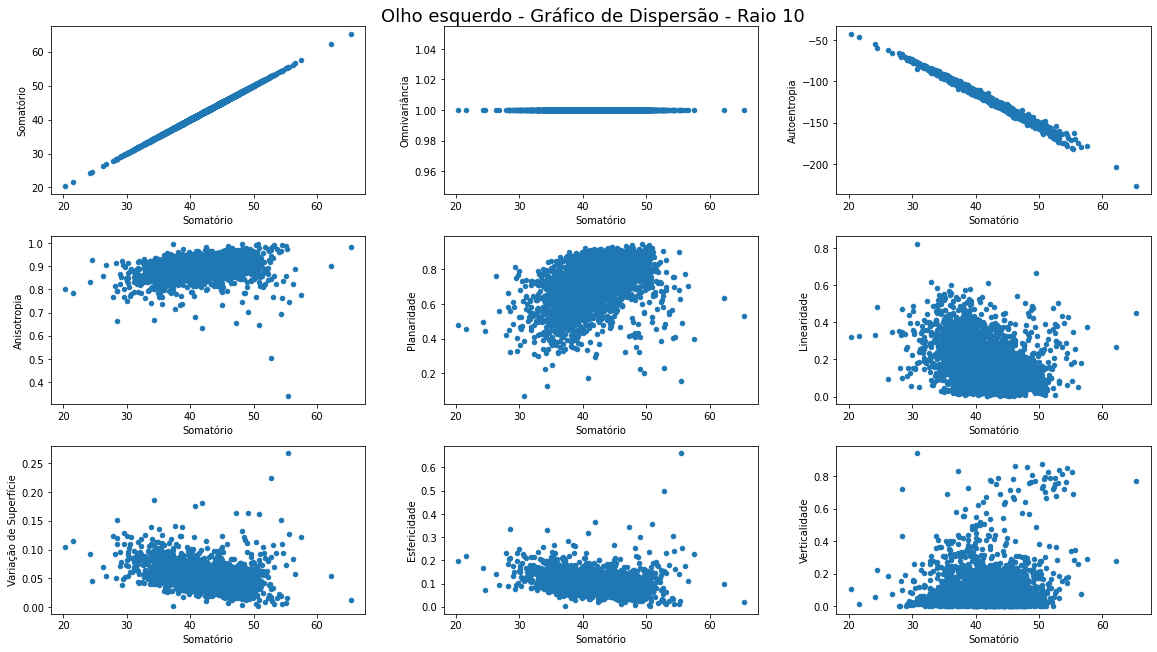

In [21]:
plot_scatterplot(dfr10_le, 'Somatório', title='Olho esquerdo - Gráfico de Dispersão - Raio 10')

In [22]:
def plot_scatterplot_together(dfl, dfr, dfn, column, expression=None, title=''):
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    dfl.columns = dfr.columns = dfn.columns = features
    
#     if expression is not None:
#         df = df.loc[df['expression'] == expression]

    i, j = 0, 0 # refactor
    for index, col in enumerate(dfl.columns):
        dfl.plot.scatter(ax=axes[i, j], x=column, y=col, c='r', label='Olho esquerdo')
        dfr.plot.scatter(ax=axes[i, j], x=column, y=col, c='g', label='Olho direito')
        dfn.plot.scatter(ax=axes[i, j], x=column, y=col, c='b', label='Nariz')
        axes[i, j].legend(loc='upper right')
        j += 1
        if j == 3:
            i += 1
            j = 0

    fig.suptitle(title, fontsize=18)
    plt.subplots_adjust(top=0.95, wspace=0.25, hspace=0.25)
    plt.show()

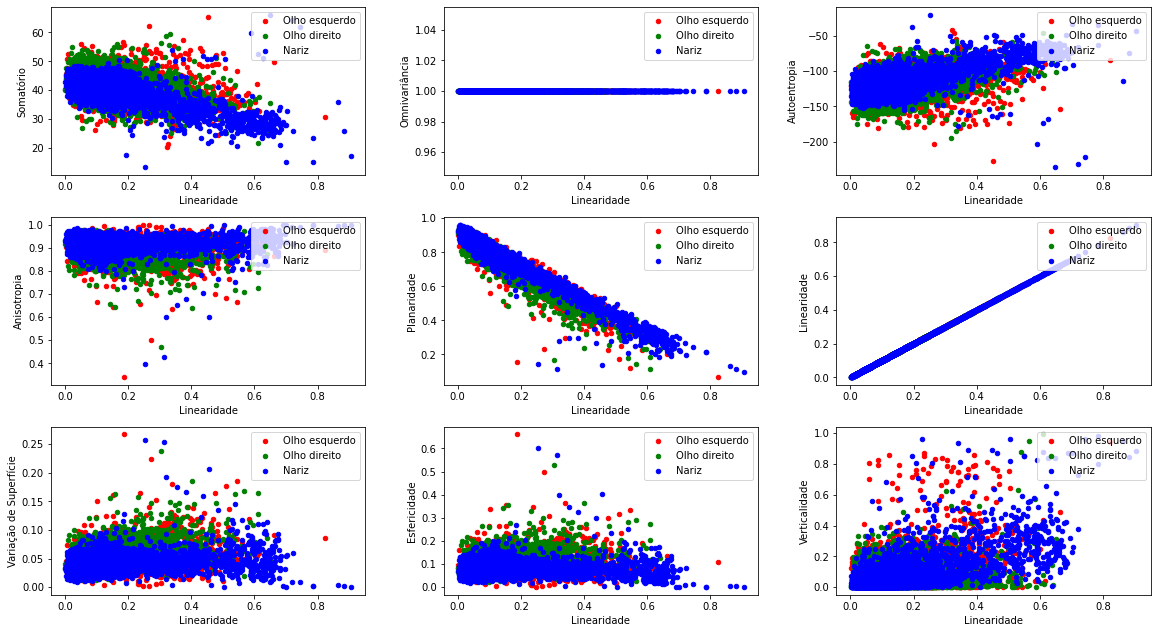

In [23]:
plot_scatterplot_together(dfr10_le, dfr10_re, dfr10_nt, 'Linearidade')

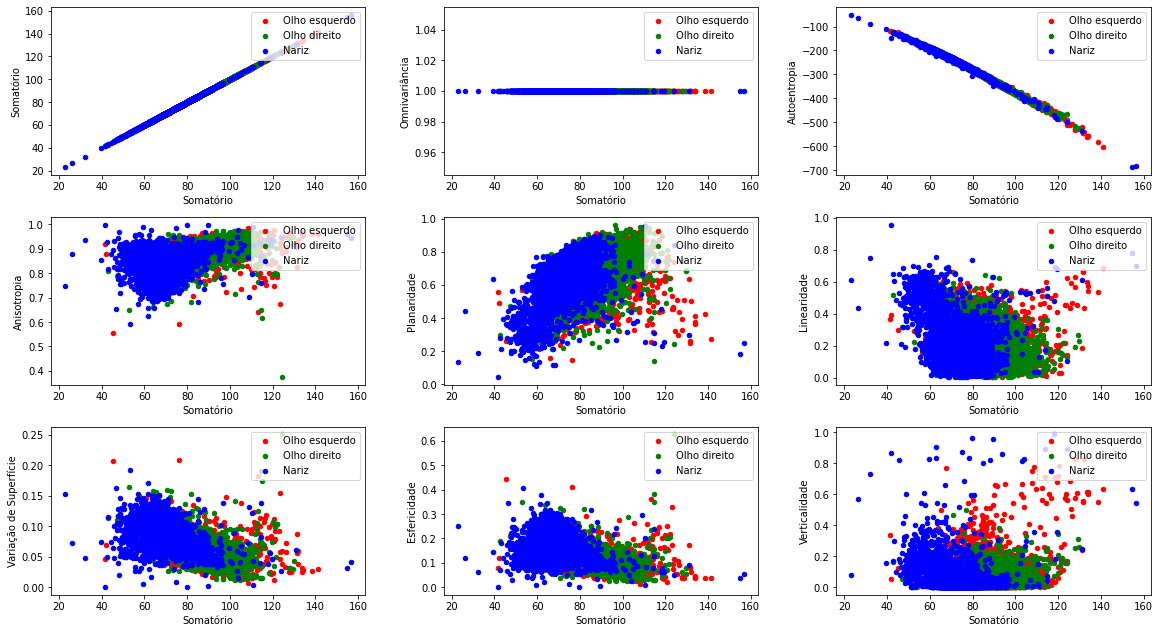

In [24]:
plot_scatterplot_together(dfr15_le, dfr15_re, dfr15_nt, 'Somatório')

In [25]:
# https://stackoverflow.com/questions/45079601/how-can-i-get-gini-coefficient-in-sklearn
def gini(data):
    x = np.array(data, dtype=np.float32)
    n = len(data)
    diffs = sum(abs(i - j) for i, j in combinations(x, r=2))

    return diffs / (2 * n**2 * data.mean())

def calculate_gini_from_histogram(df, column):
    hist, _ = np.histogram(df[column].dropna().values, bins=10)

    return gini(hist)

def calculate_ginis(df):
    colsNames = []
    for i in range(nfeatures):
        aux = []
        for i in np.arange(i, len(columns), nfeatures):
            aux.append(columns[i])
        colsNames.append(aux)

    data = []
    for i, column in enumerate(colsNames):
        ginis = []
        for j, col in enumerate(column):
            ginis.append(calculate_gini_from_histogram(df, col))
        data.append(ginis)

    return data

In [26]:
radius = pd.DataFrame(data={'Raio': [label.split(' ')[-1] for label in labels]})

def create_gini_table(df):
    data = calculate_ginis(df)
    return pd.concat([radius, pd.DataFrame(np.transpose(data), columns=features)], axis=1)

In [27]:
df_gini_le = create_gini_table(df_le)
df_gini_le

,Raio,Somatório,Omnivariância,Autoentropia,Anisotropia,Planaridade,Linearidade,Variação de Superfície,Esfericidade,Verticalidade
0,10,0.348215,0.45,0.353521,0.406199,0.311553,0.322672,0.395128,0.406199,0.399083
1,15,0.352098,0.45,0.354342,0.371394,0.280391,0.266233,0.361577,0.371394,0.394597
2,20,0.368234,0.45,0.365943,0.333647,0.283285,0.283430,0.332176,0.333647,0.379209
3,25,0.367583,0.45,0.356199,0.352388,0.305258,0.314954,0.329378,0.352388,0.373107
4,30,0.395755,0.45,0.393439,0.375350,0.327135,0.328751,0.341727,0.375350,0.392354


In [28]:
df_gini_re = create_gini_table(df_re)
df_gini_re

,Raio,Somatório,Omnivariância,Autoentropia,Anisotropia,Planaridade,Linearidade,Variação de Superfície,Esfericidade,Verticalidade
0,10,0.315505,0.45,0.309702,0.381743,0.307867,0.284014,0.372339,0.381743,0.425573
1,15,0.329656,0.45,0.323005,0.394472,0.289312,0.258394,0.370183,0.394472,0.381835
2,20,0.322294,0.45,0.316720,0.368830,0.290734,0.297271,0.347569,0.368830,0.363486
3,25,0.332729,0.45,0.328394,0.390436,0.291422,0.305482,0.370780,0.390436,0.367867
4,30,0.364725,0.45,0.362959,0.401468,0.298853,0.281422,0.374839,0.401468,0.379243


In [29]:
df_gini_nt = create_gini_table(df_nt)
df_gini_nt

,Raio,Somatório,Omnivariância,Autoentropia,Anisotropia,Planaridade,Linearidade,Variação de Superfície,Esfericidade,Verticalidade
0,10,0.376255,0.45,0.376641,0.414157,0.307100,0.336808,0.402617,0.414157,0.411390
1,15,0.384170,0.45,0.387387,0.315959,0.289961,0.309331,0.323874,0.315959,0.429193
2,20,0.376963,0.45,0.387066,0.286079,0.256113,0.222716,0.299228,0.286079,0.435628
3,25,0.350086,0.45,0.349142,0.247426,0.292299,0.228185,0.267568,0.247426,0.432068
4,30,0.363085,0.45,0.358280,0.278979,0.336937,0.307422,0.270506,0.278979,0.414178


In [30]:
def correlation_matrix(df, radius):
    df.columns = features
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, annot=True, cmap=sns.cm.rocket_r)
    plt.title(f'Matriz de correlação - Raio {radius}', fontsize=18)
    plt.show()

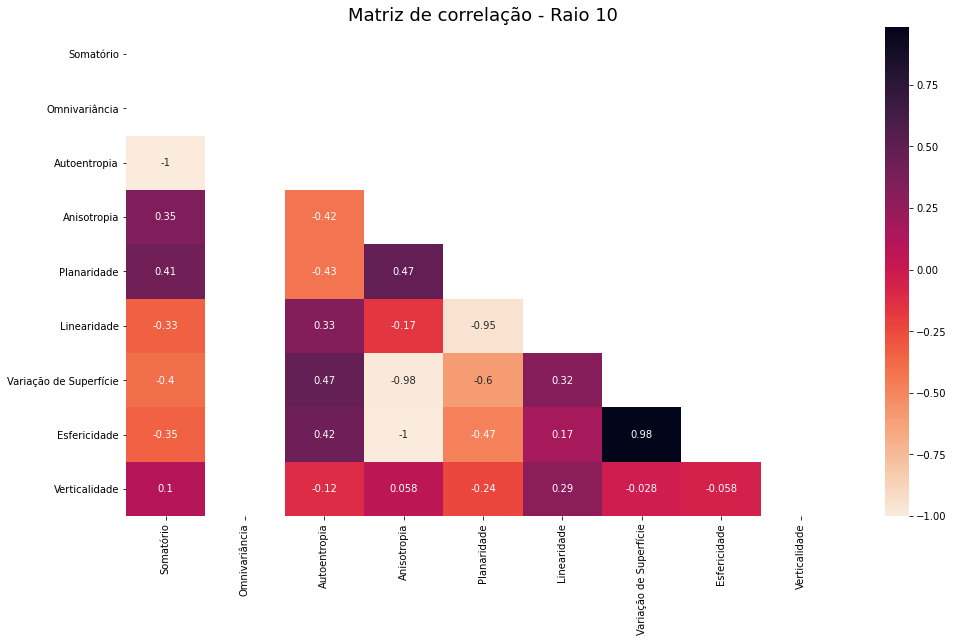

In [31]:
correlation_matrix(dfr10_le, radius=10)

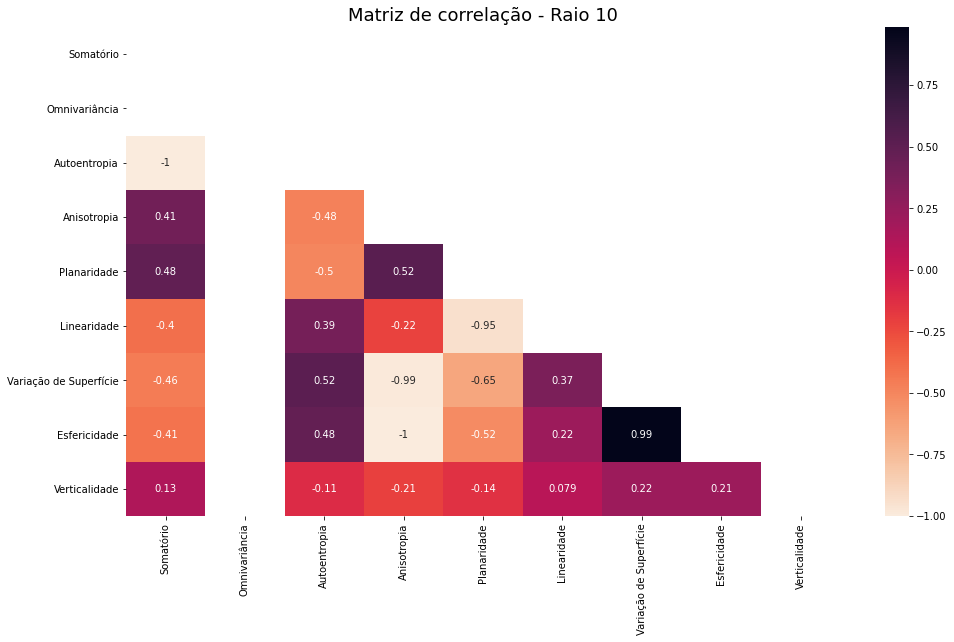

In [32]:
correlation_matrix(dfr10_re, radius=10)

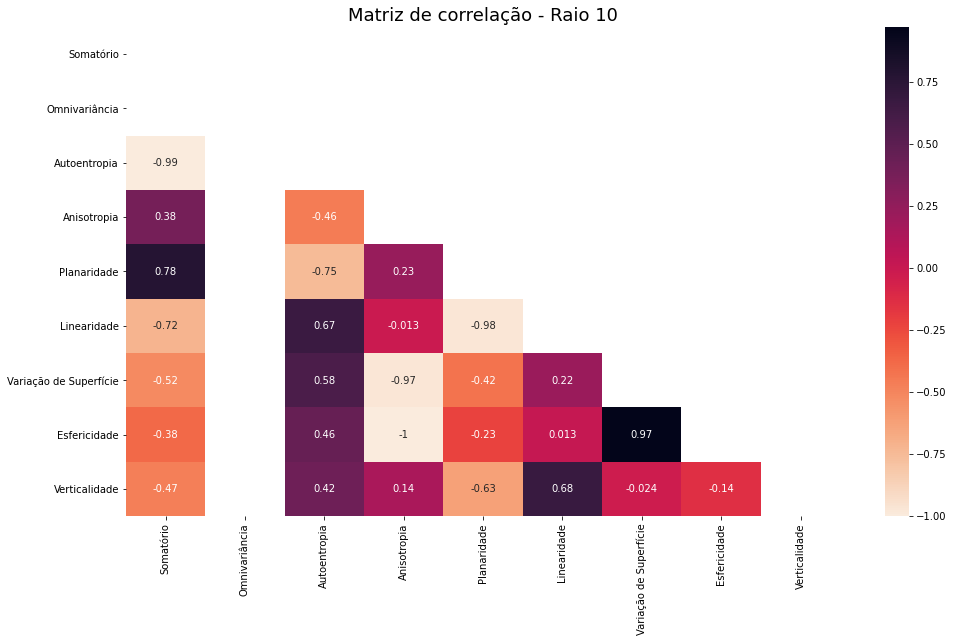

In [33]:
correlation_matrix(dfr10_nt, radius=10)

In [34]:
df_le = pd.read_csv('data/covariance_features_left_eye_v2.csv', index_col=0)

## Cantos externos dos olhos

In [35]:
df_ore = pd.read_csv('data/outer_right_eye.csv', index_col=0)
df_ore

,cloud,subject,expression,type,gf01_r_10,gf02_r_10,gf03_r_10,gf04_r_10,gf05_r_10,gf06_r_10,...,gf09_r_25,gf01_r_30,gf02_r_30,gf03_r_30,gf04_r_30,gf05_r_30,gf06_r_30,gf07_r_30,gf08_r_30,gf09_r_30
0,bs000_CR_RD_0.pcd,0,RD,CR,46.141426,8.562615,-140.014999,0.947344,0.837909,0.109435,...,0.029225,453.264587,91.938498,-2399.446533,0.927163,0.881200,0.045963,0.035936,0.072837,0.020885
1,bs000_PR_SD_0.pcd,0,SD,PR,49.952209,8.027211,-157.048462,0.966563,0.874111,0.092452,...,0.136528,434.850769,89.611136,-2282.004883,0.924384,0.844964,0.079420,0.037880,0.075616,0.128036
2,bs000_LFAU_15_0.pcd,0,15,LFAU,50.335155,10.189075,-155.950195,0.930499,0.798468,0.132031,...,0.127883,431.758667,87.757127,-2264.854248,0.928967,0.814829,0.114138,0.036299,0.071033,0.125681
3,bs000_O_GLASSES_0.pcd,0,GLASSES,O,54.059944,12.439953,-168.839508,0.886352,0.856534,0.029818,...,0.025084,434.354126,114.039457,-2236.725586,0.826522,0.617917,0.208606,0.088290,0.173478,0.032724
4,bs000_UFAU_44_0.pcd,0,44,UFAU,45.550289,8.703118,-137.240860,0.940234,0.896435,0.043799,...,0.147856,427.789612,85.705926,-2241.644531,0.931367,0.847624,0.083743,0.034578,0.068633,0.139301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,bs104_LFAU_34_0.pcd,104,34,LFAU,54.783028,10.236085,-175.597595,0.946868,0.807765,0.139103,...,0.142675,433.740601,84.242018,-2282.865967,0.938751,0.832401,0.106350,0.031331,0.061249,0.132067
4662,bs104_YR_R45_0.pcd,104,R45,YR,49.504166,8.323339,-154.737396,0.960690,0.906417,0.054272,...,0.040234,445.022888,83.753105,-2356.959473,0.943317,0.892714,0.050603,0.028256,0.056683,0.039956
4663,bs104_LFAU_12R_0.pcd,104,12R,LFAU,52.856071,10.163923,-167.063919,0.940360,0.847738,0.092623,...,0.118630,432.502930,84.414839,-2274.636230,0.938019,0.822037,0.115983,0.031850,0.061981,0.112217
4664,bs104_PR_U_0.pcd,104,U,PR,53.526974,9.195171,-171.358337,0.959434,0.825226,0.134208,...,0.137676,428.884583,83.638734,-2251.658936,0.936723,0.871140,0.065583,0.031675,0.063277,0.132660


In [36]:
df_ore_exp = df_ore.loc[df_ore['type'] == 'E']

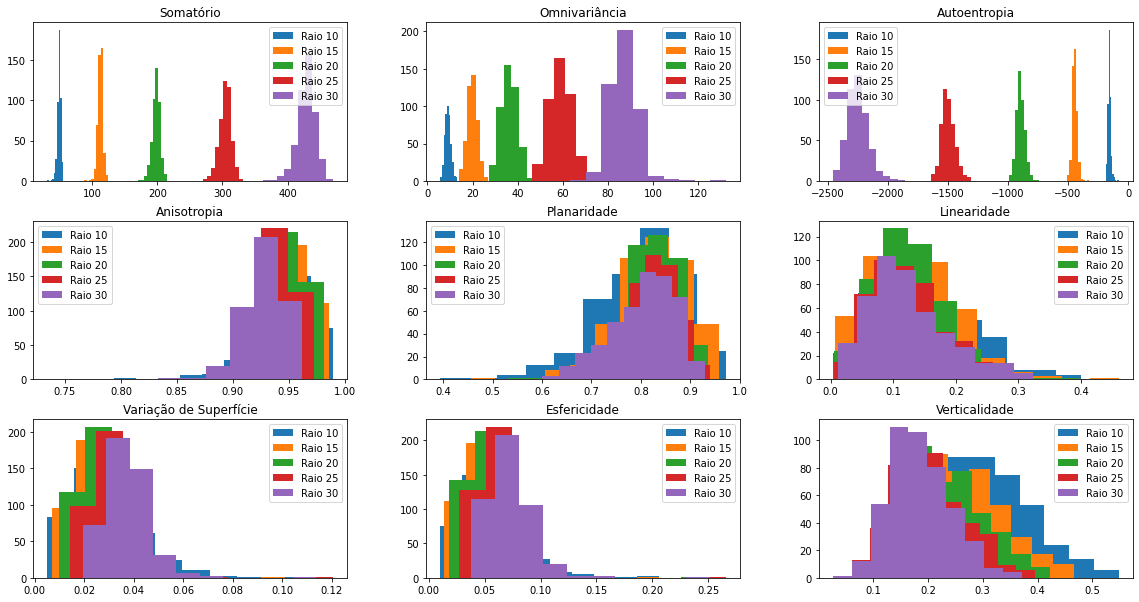

In [37]:
plot_histograms_together(df_ore_exp, columns=list(df_ore_exp.columns)[4:], title='')

In [38]:
# plot_histograms(df_ore, point_name='Olho externo direito', radius=10)

In [39]:
df_ole = pd.read_csv('data/outer_left_eye.csv', index_col=0)
df_ole

,cloud,subject,expression,type,gf01_r_10,gf02_r_10,gf03_r_10,gf04_r_10,gf05_r_10,gf06_r_10,...,gf09_r_25,gf01_r_30,gf02_r_30,gf03_r_30,gf04_r_30,gf05_r_30,gf06_r_30,gf07_r_30,gf08_r_30,gf09_r_30
0,bs000_CR_RD_0.pcd,0,RD,CR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bs000_PR_SD_0.pcd,0,SD,PR,50.105228,7.018077,-158.711700,0.977921,0.917675,0.060246,...,0.163649,434.292358,86.019277,-2283.635498,0.933600,0.860742,0.072857,0.033308,0.066400,0.148071
2,bs000_LFAU_15_0.pcd,0,15,LFAU,52.001396,10.851653,-162.260345,0.921587,0.828589,0.092998,...,0.132124,434.871887,85.030200,-2289.304199,0.937771,0.817425,0.120346,0.032046,0.062229,0.122375
3,bs000_O_GLASSES_0.pcd,0,GLASSES,O,44.392445,7.999074,-133.323166,0.952432,0.830121,0.122311,...,0.153321,425.680359,88.149845,-2225.823486,0.927037,0.728274,0.198764,0.038930,0.072963,0.154425
4,bs000_UFAU_44_0.pcd,0,44,UFAU,51.077381,7.554051,-162.427734,0.974344,0.873539,0.100805,...,0.135351,431.601227,82.947337,-2270.772705,0.941002,0.828967,0.112035,0.030303,0.058998,0.128775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,bs104_LFAU_34_0.pcd,104,34,LFAU,46.434654,8.942240,-140.892822,0.942575,0.752837,0.189739,...,0.164813,430.859802,84.953940,-2262.550293,0.933515,0.894676,0.038839,0.032789,0.066485,0.150129
4662,bs104_YR_R45_0.pcd,104,R45,YR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4663,bs104_LFAU_12R_0.pcd,104,12R,LFAU,50.346947,10.382539,-155.676712,0.925194,0.817348,0.107845,...,0.133801,433.309235,90.634297,-2270.157715,0.919429,0.867065,0.052364,0.039725,0.080571,0.124282
4664,bs104_PR_U_0.pcd,104,U,PR,49.118042,9.410920,-151.693588,0.941055,0.848959,0.092096,...,0.162276,425.908325,83.143914,-2232.838623,0.935845,0.891805,0.044040,0.031758,0.064155,0.152888


In [40]:
# plot_histograms(df_ole, point_name='Olho externo esquerdo', radius=10)

In [41]:
df_lmc = pd.read_csv('data/left_mouth_corner.csv', index_col=0)
df_lmc

,cloud,subject,expression,type,gf01_r_10,gf02_r_10,gf03_r_10,gf04_r_10,gf05_r_10,gf06_r_10,...,gf09_r_25,gf01_r_30,gf02_r_30,gf03_r_30,gf04_r_30,gf05_r_30,gf06_r_30,gf07_r_30,gf08_r_30,gf09_r_30
0,bs000_CR_RD_0.pcd,0,RD,CR,49.541588,6.066760,-157.149368,0.985662,0.889297,0.096365,...,0.500751,398.284851,43.451290,-2108.213623,0.990971,0.598804,0.392167,0.005585,0.009029,0.487505
1,bs000_PR_SD_0.pcd,0,SD,PR,49.988094,5.945045,-159.102249,0.986571,0.940670,0.045901,...,0.146743,447.223633,51.295551,-2405.075439,0.988193,0.905028,0.083165,0.006122,0.011807,0.144023
2,bs000_LFAU_15_0.pcd,0,15,LFAU,48.588867,6.443965,-152.736847,0.981302,0.927107,0.054195,...,0.137160,445.046021,39.602865,-2397.787109,0.994423,0.955479,0.038944,0.002836,0.005577,0.136889
3,bs000_O_GLASSES_0.pcd,0,GLASSES,O,48.627014,5.892110,-153.333572,0.985543,0.973426,0.012116,...,0.135843,447.859375,51.740227,-2408.829834,0.987910,0.908322,0.079587,0.006256,0.012090,0.132410
4,bs000_UFAU_44_0.pcd,0,44,UFAU,48.012291,7.376997,-149.393646,0.970666,0.900378,0.070288,...,0.142561,447.857361,47.966215,-2411.196289,0.990286,0.936279,0.054006,0.004967,0.009714,0.137202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,bs104_LFAU_34_0.pcd,104,34,LFAU,50.778198,6.873512,-161.720078,0.979791,0.955147,0.024644,...,0.090849,443.041565,58.162649,-2372.834229,0.982266,0.882639,0.099627,0.009245,0.017734,0.087348
4662,bs104_YR_R45_0.pcd,104,R45,YR,44.911964,8.543181,-136.097488,0.948543,0.514382,0.434161,...,0.674183,377.606628,57.947184,-1971.303467,0.974337,0.482532,0.491805,0.016731,0.025663,0.602638
4663,bs104_LFAU_12R_0.pcd,104,12R,LFAU,42.630650,8.800022,-124.920502,0.928587,0.702245,0.226342,...,0.157706,412.609497,75.226257,-2158.840820,0.951796,0.772604,0.179192,0.025791,0.048204,0.171492
4664,bs104_PR_U_0.pcd,104,U,PR,47.807243,6.834845,-149.048859,0.976319,0.929216,0.047103,...,0.127448,454.042755,56.772466,-2445.180176,0.984698,0.890462,0.094236,0.007965,0.015302,0.117501


In [42]:
df_lmc_exp = df_lmc.loc[df_lmc['type'] == 'E']
df_lmc_exp.describe()

,subject,gf01_r_10,gf02_r_10,gf03_r_10,gf04_r_10,gf05_r_10,gf06_r_10,gf07_r_10,gf08_r_10,gf09_r_10,...,gf09_r_25,gf01_r_30,gf02_r_30,gf03_r_30,gf04_r_30,gf05_r_30,gf06_r_30,gf07_r_30,gf08_r_30,gf09_r_30
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,...,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,47.973510,47.089919,9.292291,-142.976628,0.912006,0.703860,0.208146,0.046562,0.087994,0.163822,...,0.164843,441.476248,71.439677,-2347.422018,0.955897,0.819616,0.136281,0.022885,0.044103,0.164371
std,33.984369,3.867309,2.366094,16.752521,0.078209,0.189398,0.145773,0.039735,0.078209,0.073876,...,0.056859,17.160863,19.227265,106.853776,0.047020,0.111409,0.088456,0.023765,0.047020,0.052412
min,0.000000,31.092712,3.749312,-177.482330,0.564453,0.123355,0.006699,0.001714,0.003368,0.001610,...,0.035283,366.682587,38.567323,-2566.865479,0.666108,0.301900,0.005316,0.002532,0.004259,0.050293
25%,19.000000,45.221237,7.345362,-154.214645,0.878961,0.558413,0.080322,0.015419,0.028276,0.110892,...,0.123041,434.332916,57.727625,-2415.901855,0.949350,0.768641,0.074921,0.008909,0.017147,0.128898
50%,38.000000,47.963821,9.160257,-146.557373,0.937626,0.719099,0.183283,0.033758,0.062374,0.158567,...,0.160189,444.643311,66.256288,-2374.337402,0.972654,0.851436,0.112025,0.014256,0.027346,0.160560
75%,85.000000,49.641029,10.999598,-134.396759,0.971725,0.884457,0.312365,0.066443,0.121039,0.208536,...,0.198908,452.259888,78.228301,-2306.410156,0.982853,0.898042,0.176710,0.026136,0.050650,0.196236
max,104.000000,56.137848,16.675199,-77.542068,0.996632,0.977007,0.663535,0.210009,0.435547,0.649049,...,0.349326,484.264526,141.895326,-1906.887939,0.995741,0.979018,0.535780,0.157214,0.333892,0.337922


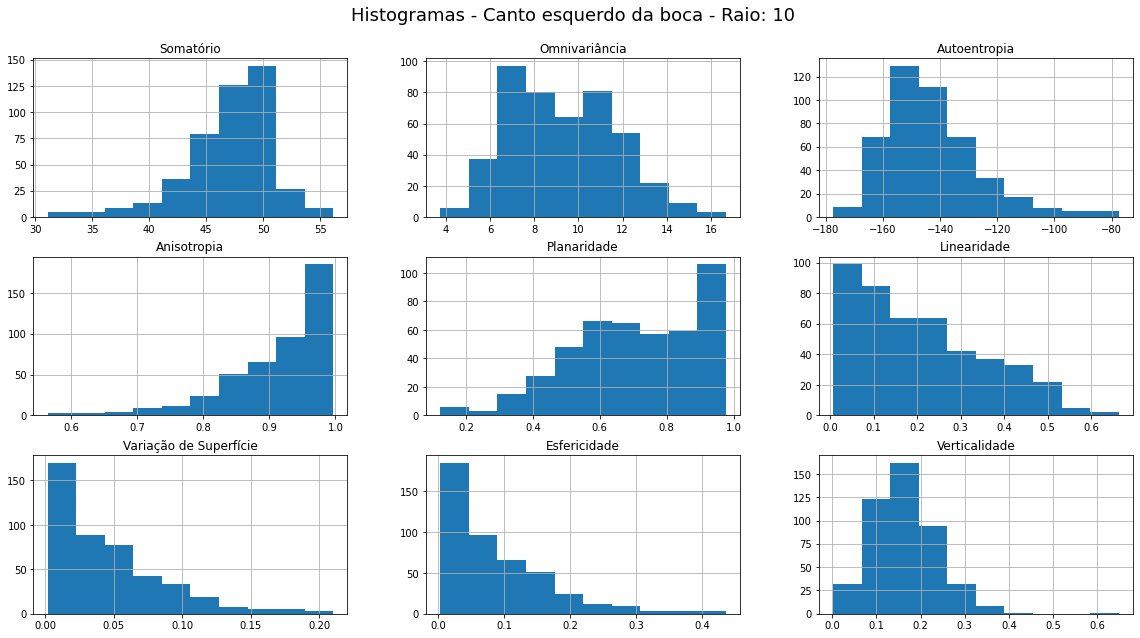

In [43]:
plot_histograms(df_lmc_exp, point_name='Canto esquerdo da boca', radius=10)

In [44]:
df_rmc = pd.read_csv('data/right_mouth_corner.csv', index_col=0)
df_rmc

,cloud,subject,expression,type,gf01_r_10,gf02_r_10,gf03_r_10,gf04_r_10,gf05_r_10,gf06_r_10,...,gf09_r_25,gf01_r_30,gf02_r_30,gf03_r_30,gf04_r_30,gf05_r_30,gf06_r_30,gf07_r_30,gf08_r_30,gf09_r_30
0,bs000_CR_RD_0.pcd,0,RD,CR,49.305138,7.651185,-154.625427,0.969245,0.932356,0.036888,...,0.035084,449.840424,56.087265,-2418.141113,0.984533,0.931229,0.053303,0.007883,0.015467,0.032856
1,bs000_PR_SD_0.pcd,0,SD,PR,46.417198,7.947317,-141.955994,0.959026,0.869912,0.089114,...,0.173120,452.167053,57.074950,-2432.505859,0.984035,0.918036,0.065999,0.008187,0.015965,0.162981
2,bs000_LFAU_15_0.pcd,0,15,LFAU,46.733101,8.557974,-142.591965,0.950127,0.816367,0.133760,...,0.156864,446.632172,45.161360,-2404.898438,0.991709,0.971357,0.020353,0.004170,0.008291,0.153367
3,bs000_O_GLASSES_0.pcd,0,GLASSES,O,44.266216,8.071740,-132.716629,0.950912,0.812680,0.138232,...,0.154641,451.957458,58.491758,-2429.930176,0.982705,0.923189,0.059515,0.008834,0.017295,0.144401
4,bs000_UFAU_44_0.pcd,0,44,UFAU,44.645180,8.494052,-133.701736,0.942447,0.848713,0.093734,...,0.168920,443.313324,53.855175,-2377.615967,0.985622,0.946249,0.039373,0.007280,0.014378,0.165490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,bs104_LFAU_34_0.pcd,104,34,LFAU,48.063057,7.528725,-149.438553,0.968618,0.912475,0.056143,...,0.085146,448.163544,58.894560,-2405.329590,0.982185,0.885742,0.096443,0.009272,0.017815,0.079967
4662,bs104_YR_R45_0.pcd,104,R45,YR,50.239883,6.676830,-159.591873,0.981159,0.929315,0.051844,...,0.083456,449.026245,55.039904,-2413.739746,0.985368,0.925489,0.059879,0.007485,0.014632,0.081474
4663,bs104_LFAU_12R_0.pcd,104,12R,LFAU,46.270744,7.548503,-141.762222,0.963856,0.934134,0.029722,...,0.141268,439.006866,61.240484,-2343.674072,0.978261,0.911984,0.066277,0.011117,0.021739,0.135003
4664,bs104_PR_U_0.pcd,104,U,PR,46.995514,7.278147,-145.171494,0.970065,0.890164,0.079901,...,0.122675,449.605774,55.682841,-2417.069824,0.984977,0.913933,0.071045,0.007728,0.015023,0.118972


In [45]:
# plot_histograms(df_rmc, point_name='Canto direito da boca', radius=10)

In [46]:
def plt_multiples_fiducial_points(dfs, column):
    fig, axes = plt.subplots(nrows=1)
    
    axes.hist(dfs[0][column], bins=10, alpha=1)
    axes.hist(dfs[1][column], bins=10, alpha=1)
    axes.hist(dfs[2][column], bins=10, alpha=1)
    axes.hist(dfs[3][column], bins=10, alpha=1)
    axes.hist(dfs[4][column], bins=10, alpha=1)
    axes.hist(dfs[5][column], bins=10, alpha=1)
    axes.hist(dfs[6][column], bins=10, alpha=1)
    axes.legend([
        'Left inner eye', 'Right inner eye', 'Nose tip', 'Outer right eye',
        'Outer left eye', 'Left mouth corner', 'Right mouth corner'])
    axes.set_title(column)
    
    plt.show()

In [47]:
all_datasets = [df_le, df_re, df_nt, df_ore, df_ole, df_lmc, df_rmc]

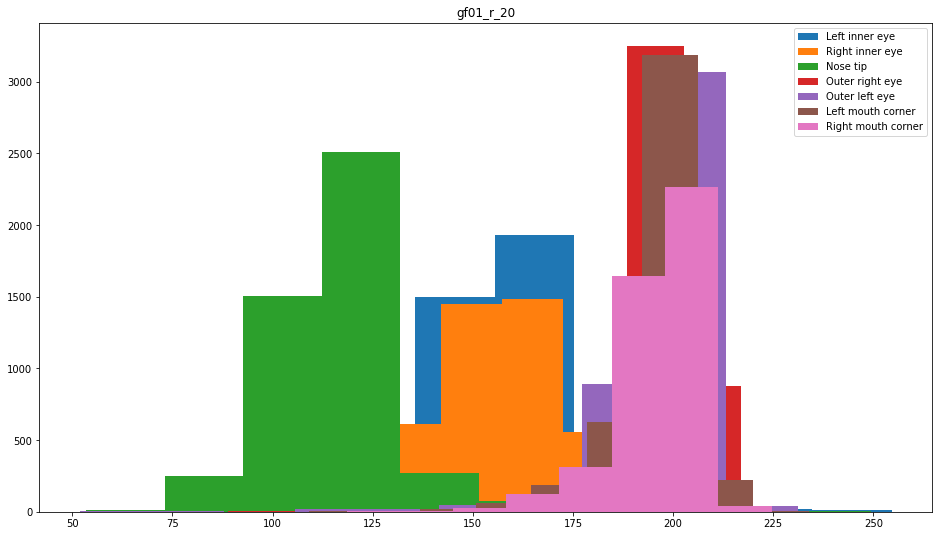

In [48]:
plt_multiples_fiducial_points(all_datasets, 'gf01_r_20')

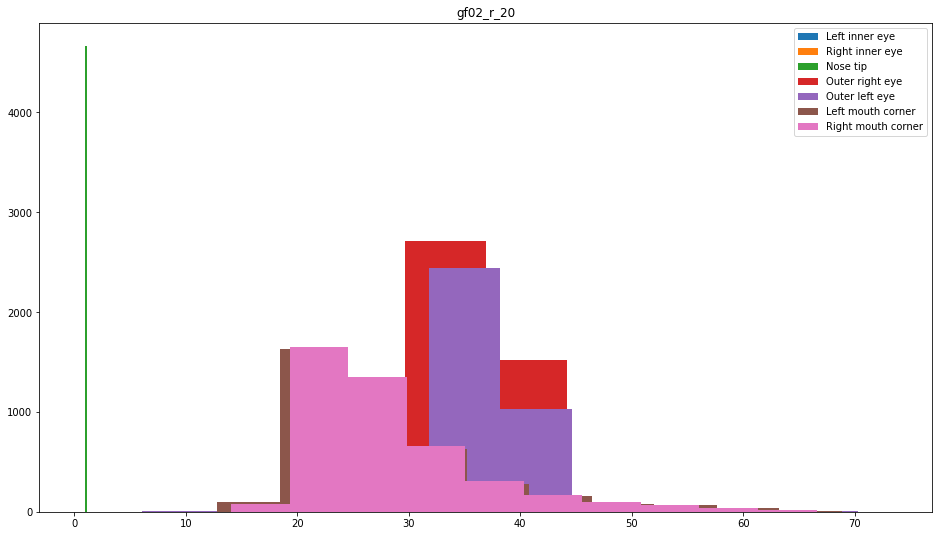

In [49]:
plt_multiples_fiducial_points(all_datasets, 'gf02_r_20')

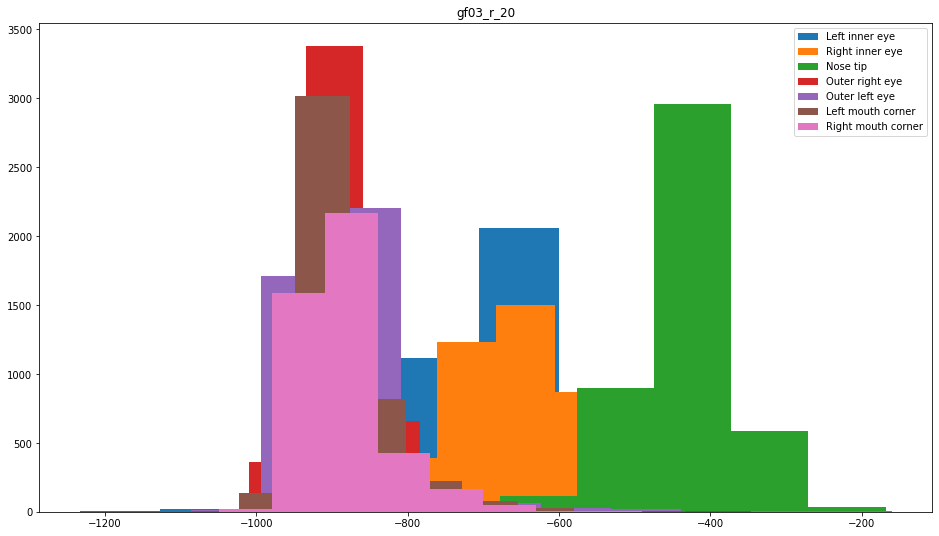

In [50]:
plt_multiples_fiducial_points(all_datasets, 'gf03_r_20')

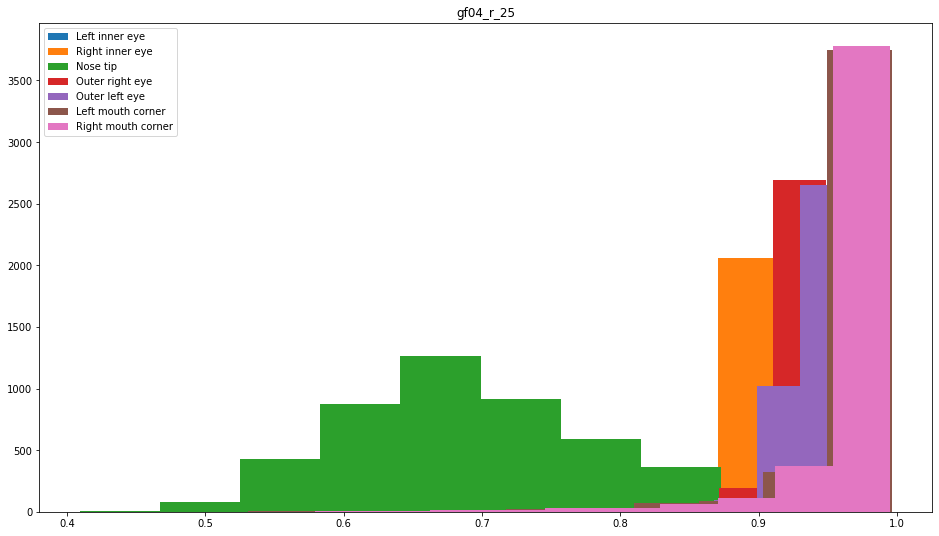

In [51]:
plt_multiples_fiducial_points(all_datasets, 'gf04_r_25')

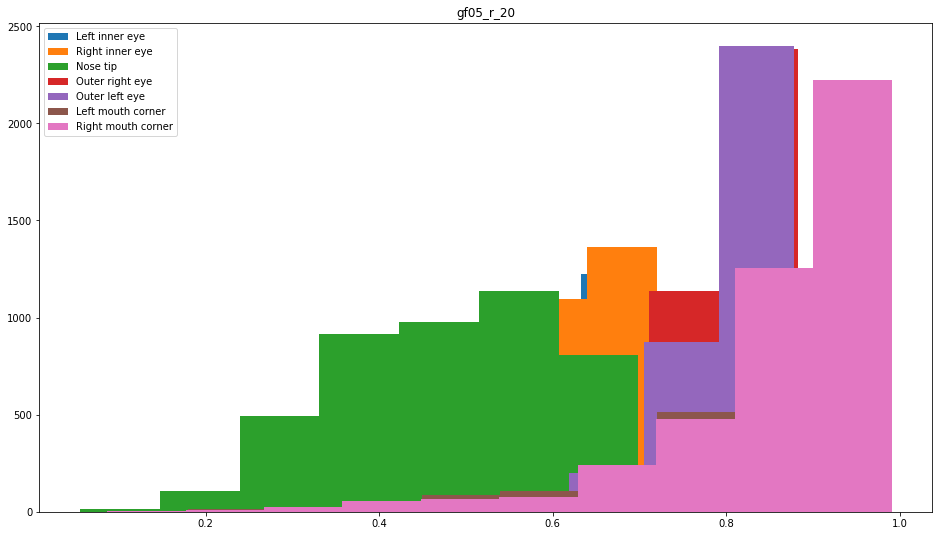

In [52]:
plt_multiples_fiducial_points(all_datasets, 'gf05_r_20')

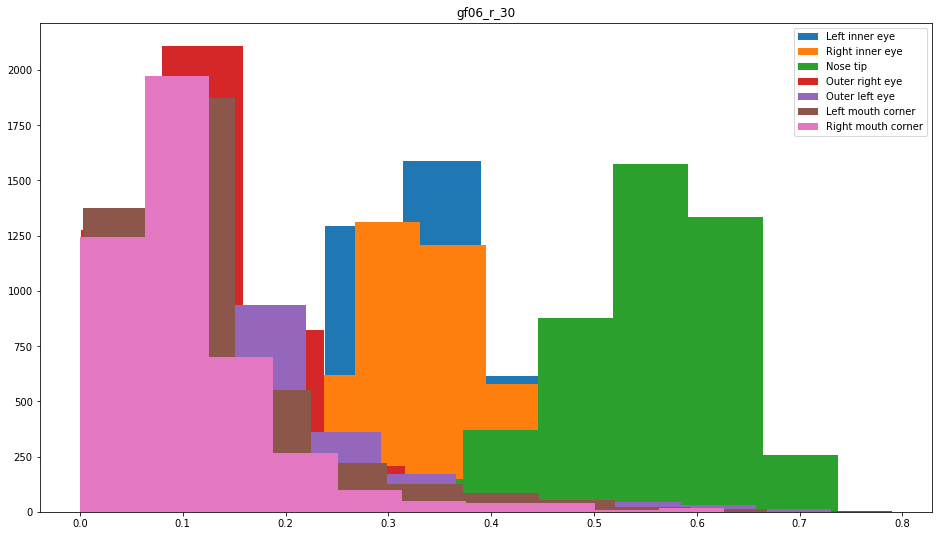

In [53]:
plt_multiples_fiducial_points(all_datasets, 'gf06_r_30')

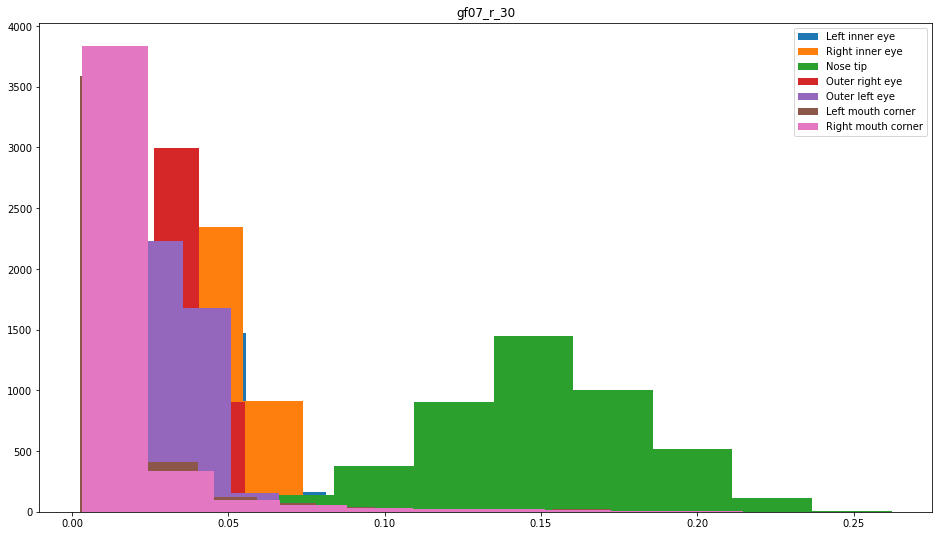

In [54]:
plt_multiples_fiducial_points(all_datasets, 'gf07_r_30')

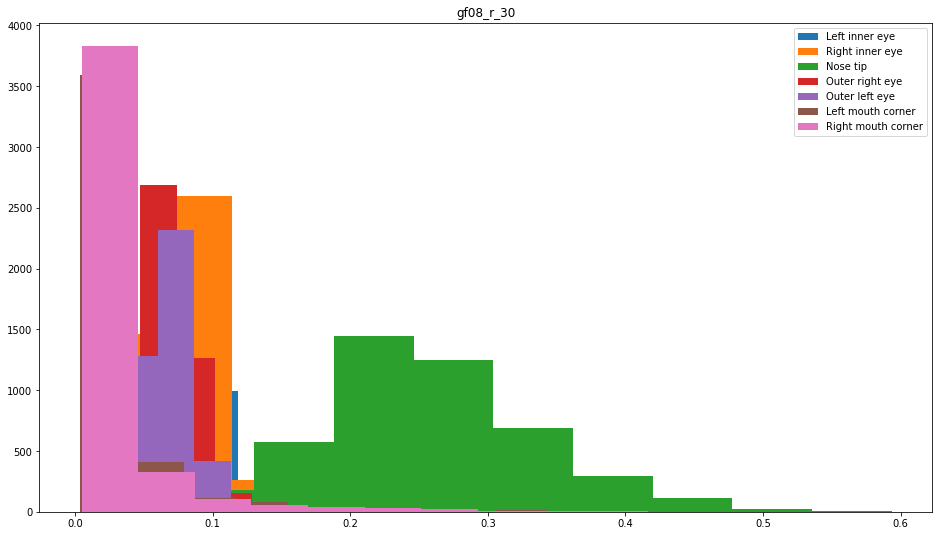

In [55]:
plt_multiples_fiducial_points(all_datasets, 'gf08_r_30')

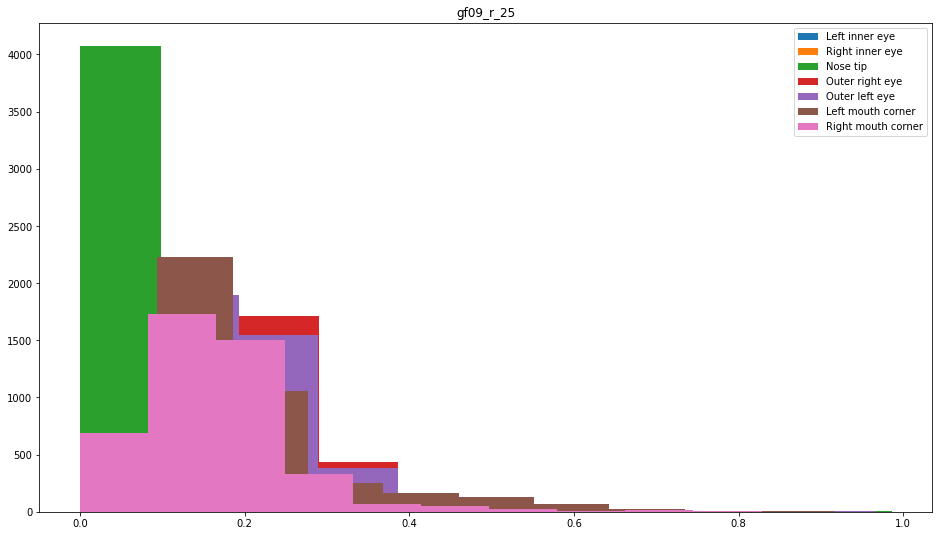

In [56]:
plt_multiples_fiducial_points(all_datasets, 'gf09_r_25')